In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno
from bokeh.core.properties import value
from bokeh.io import show,output_notebook
from bokeh.plotting import figure
from bokeh.models import (
    ColumnDataSource,
    
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.layouts import row
from sklearn.linear_model import ElasticNet, LinearRegression as lr
from sklearn.ensemble import GradientBoostingRegressor as gbr, RandomForestRegressor as rfr
from preprocess import impute
pd.set_option('display.max_rows', 500)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()
y_train = train_df['SalePrice']
X_train = train_df.drop('SalePrice', axis=1)
X_test = test_df.copy()

In [5]:
all_data = pd.concat([X_train, X_test])
all_data.shape

(2919, 80)

In [6]:
all_data = impute(all_data)

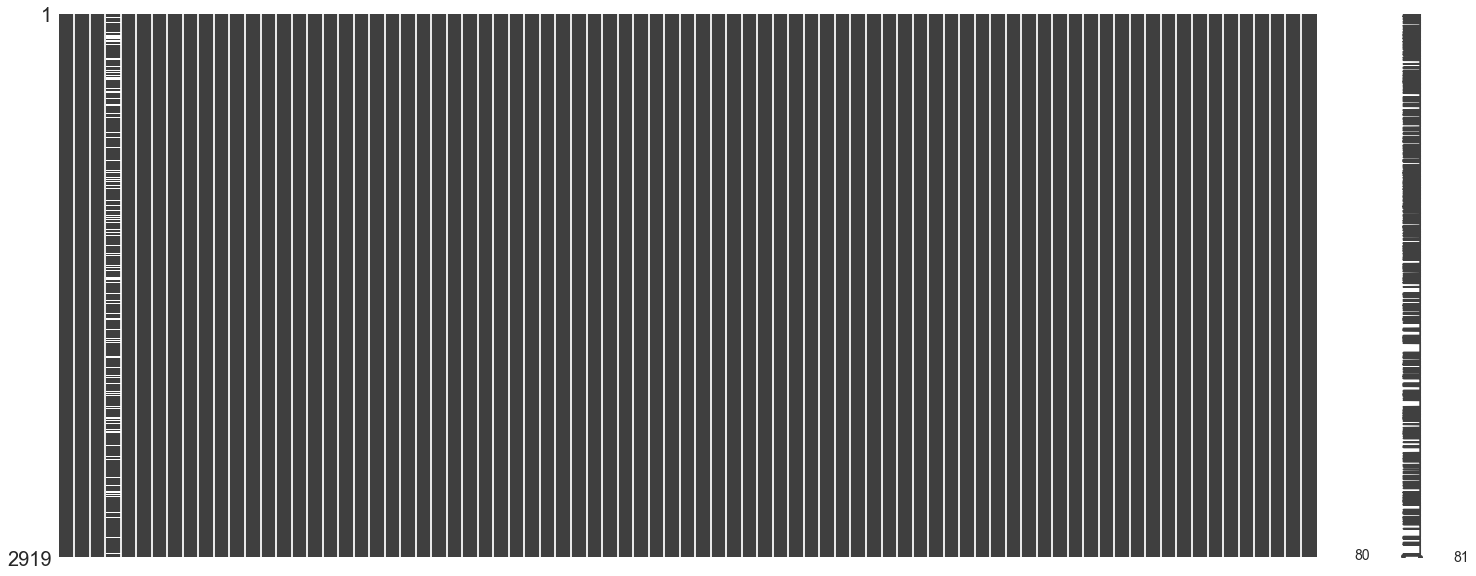

In [7]:
msno.matrix(all_data)

In [8]:
X_test["LotFrontage111"] = X_train.groupby(["BldgType","MSZoning"])["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage222"] = X_train.groupby(["BldgType","Neighborhood"])["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage555"] = X_train.groupby(["MSZoning","MSSubClass"])["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage333"] = X_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage444"] = X_train.groupby("MSSubClass")["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage555"] = X_train.groupby("HouseStyle")["LotFrontage"].transform(lambda x: x.median())
X_test["LotFrontage666"] = X_train.groupby(["MSZoning","HouseStyle"])["LotFrontage"].transform(lambda x: x.median())

In [9]:
np.mean((X_test["LotFrontage111"] - X_test["LotFrontage"])**2)
#"BldgType","MSZoning"

646.6680194805194

In [10]:
np.mean((X_test["LotFrontage222"] - X_test["LotFrontage"])**2)
#"BldgType","Neighborhood"

708.8262195121952

In [11]:
np.mean((X_test["LotFrontage333"] - X_test["LotFrontage"])**2)
#"Neighborhood"

641.429586038961

In [12]:
np.mean((X_test["LotFrontage444"] - X_test["LotFrontage"])**2)
#"MSSubClass"

682.4780844155844

In [13]:
np.mean((X_test["LotFrontage555"] - X_test["LotFrontage"])**2)
#"HouseStyle"

515.5868506493506

In [14]:
np.mean((X_test["LotFrontage666"] - X_test["LotFrontage"])**2)
#"MSZoning","HouseStyle"

574.4498782467532